<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#create" data-toc-modified-id="create-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>create</a></span></li><li><span><a href="#insert" data-toc-modified-id="insert-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>insert</a></span></li><li><span><a href="#update" data-toc-modified-id="update-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>update</a></span></li><li><span><a href="#대량-데이터-입력" data-toc-modified-id="대량-데이터-입력-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>대량 데이터 입력</a></span></li></ul></div>

In [28]:
!pip install cx_oracle

In [1]:
import cx_Oracle
dsn=cx_Oracle.makedsn('localhost',1521,'xe')
dsn

'(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))'

In [36]:
db=cx_Oracle.connect('C##CAKD5','CAKD5',dsn)
db

<cx_Oracle.Connection to C##CAKD5@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))>

In [5]:
import pandas as pd
cursor = db.cursor()
cursor.execute('select * from book')
x = cursor.fetchall()
columns=['BOOKID','BOOKNAME','PUBLISHER','PRICE']
df = pd.DataFrame(x,columns=columns)
df

,BOOKID,BOOKNAME,PUBLISHER,PRICE
0,1,축구의 역사,굿스포츠,7000
1,2,축구아는 여자,나무수,13000
2,3,축구의 이해,대한미디어,22000
3,4,골프 바이블,대한미디어,35000
4,5,피겨 교본,굿스포츠,8000
5,6,역도 단계별기술,굿스포츠,6000
6,7,야구의 추억,이상미디어,20000
7,8,야구를 부탁해,이상미디어,13000
8,9,올림픽 이야기,삼성당,7500
9,10,Olympic Champions,Pearson,13000


In [14]:
cursor.execute('select * from customer')
x=cursor.fetchall()
df_coustomer=pd.DataFrame(x)
df_coustomer

,0,1,2,3
0,1,박지성,영국 맨체스타,000-5000-0001
1,2,김연아,대한민국 서울,000-6000-0001
2,3,장미란,대한민국 강원도,000-7000-0001
3,4,추신수,미국 클리블랜드,000-8000-0001
4,5,박세리,대한민국 대전,None


### create 

In [42]:
import cx_Oracle

con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = 'create table sample1(id varchar2(10), score number)'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

### insert

In [43]:
def insert(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = 'insert into sample1(id, score) values(:1, :2)'
    cursor.execute(sql, t)
    cursor.close()
    con.commit()
    con.close()

insert(('111', 80))

In [44]:
rows=[('112',90),('113',80),('114',70),('115',90),('116',85)]
def insertmany(t):
    con=cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor=con.cursor()
    sql="insert into sample1 (id,score) values(:1,:2)" 
    cursor.executemany(sql,t)
    cursor.close()
    con.commit()
    con.close()
insertmany(rows)

In [ ]:
Q 3개의 속성(col1,col2,col3)으로 구성된 테이블 smaple2 생성 10개의 데이터 입력

In [2]:
def run():
    con=cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor=con.cursor()
    sql='create table sample2(col01 varchar2(10), col02 varchar2(10), col03 varchar2(10),\
        constraint sample_pk primary key(col01))'
    cursor.execute(sql)
    cursor.close()
    con.commit()
    con.close()
run()

DatabaseError: ORA-00955: 기존의 객체가 이름을 사용하고 있습니다.

In [3]:
rows=[(1,2,3),(2,2,8),(3,2,5),(4,7,9),(5,0,1),(6,6,1),(7,2,7),(8,3,1),(9,5,4),(10,2,4),(11,0,1)]
def insertcol(t):
    con=cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor=con.cursor()
    sql="insert into sample2 (col01,col02,col03) values(:1,:2,:3)" 
    cursor.executemany(sql,t)
    cursor.close()
    con.commit()
    con.close()
insertcol(rows)

### update

In [5]:
def updatecol(t):
    con=cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor=con.cursor()
    sql="update sample2 set col02 = :1 where col03=:2 "
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
updatecol(('1','3'))

In [11]:
def delectcol(t):
    con=cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor=con.cursor()
    sql=f"delete from sample2 where col02={t} "
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
delectcol(2)
delectcol((10,))

In [16]:
import pandas as pd
con=cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor=con.cursor()
sql="select * from sample2 "
cursor.execute(sql)
x=cursor.fetchall()
df_col=pd.DataFrame(x)
print(df_col)
cursor.execute("select column_name from user_tab_columns where table_name='SAMPLE2'")
col=cursor.fetchall()
list_py=[]
for i in col:
    for j in i:
        list_py.append(j)
df_col.columns=list_py
display(df_col)
cursor.close()
con.close()

    0  1  2
0   1  1  3
1   4  7  9
2   5  0  1
3   6  6  1
4   8  3  1
5   9  5  4
6  11  0  1


,COL01,COL02,COL03
0,1,1,3
1,4,7,9
2,5,0,1
3,6,6,1
4,8,3,1
5,9,5,4
6,11,0,1


In [29]:
df_col

,COL01,COL02,COL03
0,1,1,3
1,4,7,9
2,5,0,1
3,6,6,1
4,8,3,1
5,9,5,4
6,11,0,1


In [19]:
df_col.to_csv('./data/col3.csv')

In [32]:
import csv
with open('./data/col3.csv','r')as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    data=[]
    for line in csv_reader:
        data.append((line[1],line[2],line[3]))
data

[('1', '1', '3'),
 ('4', '7', '9'),
 ('5', '0', '1'),
 ('6', '6', '1'),
 ('8', '3', '1'),
 ('9', '5', '4'),
 ('11', '0', '1')]

In [34]:
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = 'alter table sample2 drop constraint sample_pk'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

DatabaseError: ORA-02443: 존재하지 않는 제약 - 삭제할 수 없습니다

In [35]:
with open('./data/col3.csv','r')as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = 'insert into sample2 (col01,col02,col03)values(:1,:2,:3)'
    data=[]
    for line in csv_reader:
        data.append((line[1],line[2],line[3]))
    cursor.executemany(sql,data)
    cursor.close()
    con.commit
    con.close()

### 대량 데이터 입력

In [2]:
import cx_Oracle

con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = 'create table sample3(id varchar2(10), sales number)'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

DatabaseError: ORA-00955: 기존의 객체가 이름을 사용하고 있습니다.

In [4]:
import numpy as np
import pandas as pd
df=pd.DataFrame()
df['id']=np.arange(10000)
df['sales']=np.random.randint(1,100,size=10000)

In [5]:
df

,id,sales
0,0,20
1,1,39
2,2,21
3,3,61
4,4,29
...,...,...
9995,9995,88
9996,9996,88
9997,9997,6
9998,9998,29


In [6]:
data = [tuple(df.iloc[i]) for i in range(len(df))]    

con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = 'insert into sample3 (id, sales) values(:1, :2)'
cursor.executemany(sql, data)
cursor.close()
con.commit()
con.close()

In [8]:
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = 'alter table sample3 modify(id number)'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

DatabaseError: ORA-01439: 데이터 유형을 변경할 열은 비어 있어야 합니다

In [11]:
con=cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor=con.cursor()
sql="select * from employees"
cursor.execute(sql)
x=cursor.fetchall()
df_col=pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='EMPLOYEES'")
col=cursor.fetchall()
list_py=[]
for i in col:
    for j in i:
        list_py.append(j)
df_col.columns=list_py
cursor.close()
con.close()
df_col

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,2002-06-07,HR_REP,6500.0,NaN,101.0,40.0
104,204,Hermann,Baer,HBAER,515.123.8888,2002-06-07,PR_REP,10000.0,NaN,101.0,70.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,2002-06-07,AC_MGR,12008.0,NaN,101.0,110.0


In [30]:
con=cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor=con.cursor()
sql="select department_id, avg(salary) from employees group by department_id order by department_id"
cursor.execute(sql)
x=cursor.fetchall()
df_col=pd.DataFrame(x)
df_col.columns=['부서','평균연봉']
cursor.close()
con.close()
df_col

,부서,평균연봉
0,10.0,4400.000000
1,20.0,9500.000000
2,30.0,4150.000000
3,40.0,6500.000000
4,50.0,3475.555556
5,60.0,5760.000000
6,70.0,10000.000000
7,80.0,8955.882353
8,90.0,19333.333333
9,100.0,8601.333333


In [39]:
df_col.set_index("부서")

,평균연봉
부서,
10.0,4400.000000
20.0,9500.000000
30.0,4150.000000
40.0,6500.000000
50.0,3475.555556
60.0,5760.000000
70.0,10000.000000
80.0,8955.882353
90.0,19333.333333


<AxesSubplot:ylabel='부서'>

C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.ca

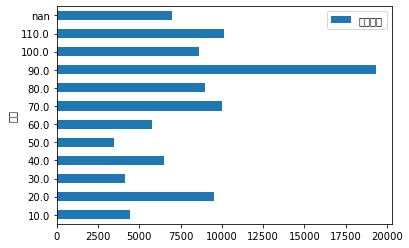

In [47]:
df_col.plot.barh(x='부서', y='평균연봉')

In [50]:

con=cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor=con.cursor()
sql="SELECT 고객번호, YEAR, SUM(구매금액), ROUND(AVG(구매금액)) FROM PURPROD GROUP BY 고객번호,YEAR ORDER BY 고객번호"
cursor.execute(sql)
x=cursor.fetchall()
df_col=pd.DataFrame(x)
df_col.columns=['CUSTID','YEAR','구매금액','평균구매금액']
cursor.close()
con.close()
df_col

,CUSTID,YEAR,구매금액,평균구매금액
0,00001,2014,54041667,90979
1,00001,2015,31000883,66957
2,00002,2014,46245330,75812
3,00002,2015,53635430,105999
4,00003,2014,1893769,2563
...,...,...,...,...
38701,19380,2014,522700,30747
38702,19380,2015,3390277,8015
38703,19381,2015,6040669,7504
38704,19382,2015,4401773,4858
